<h2>Step 1: Making the Imports</h2>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Step 2: Data Reading and Preprocessing</h2>
<h4>2.1. Data Import and Overview</h4>

In [5]:
data = pd.read_csv(r"D:/NSUT/Semester 5/Data Mining/Project/heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<p>We have a dataset of 918 items with 12 attributes. The feature space possesses both categorical and numerical attributes.</p>

<h4>2.2. Checking for blank or missing values</h4>

In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<p>There are no blank or missing values in this dataset.</p>

<h4>2.3. Checking for correlation using Correlation Matrix</h4>

<AxesSubplot:title={'center':'Feature Correlations'}>

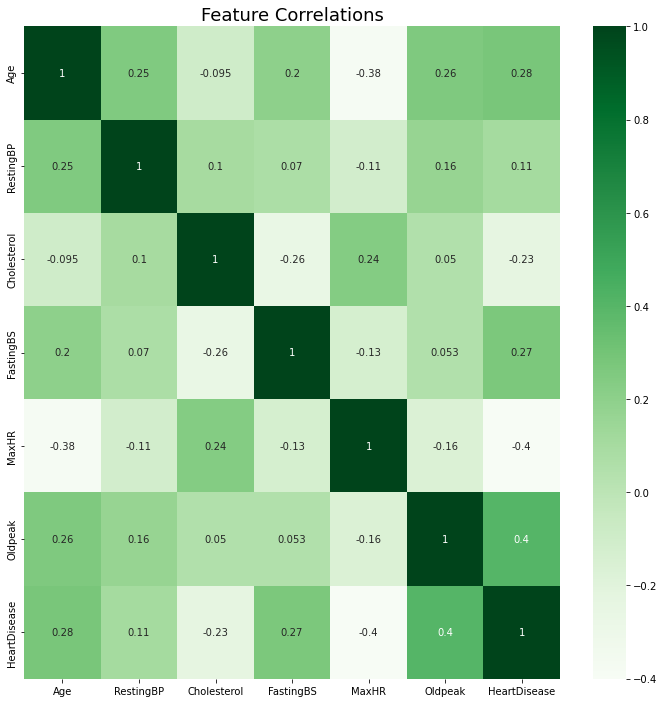

In [7]:
corr = data.corr()
plt.figure(figsize = (12, 12))
plt.title("Feature Correlations", fontsize = 18)
sns.heatmap(corr, annot = True, cmap = "Greens")

<p>No two features depict correlation greater than the threshold value of 0.5</p>

<h4>2.4. Checking for multicollinearity using VIF</h4>

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
numeric_ds = data.select_dtypes(['number'])
vif["features"] = numeric_ds.columns
vif["VIF"] = [variance_inflation_factor(numeric_ds.values, i) for i in range(numeric_ds.shape[1])]
vif

,features,VIF
0,Age,30.462968
1,RestingBP,43.070748
2,Cholesterol,5.106418
3,FastingBS,1.500987
4,MaxHR,20.458949
5,Oldpeak,2.122029
6,HeartDisease,3.222266


<p>
The restingBP, Age, and MaxHR have VIF big value. It is showing that there are colinearity in those 3 features. Therefore, we drop the biggest VIF (RestingBP) then calculate again the VIF.</p>

In [16]:
numeric_ds = numeric_ds.drop('RestingBP', axis=1)
vif.drop(vif.index, inplace=True)
vif["features"] = numeric_ds.columns
vif["VIF"] = [variance_inflation_factor(numeric_ds.values, i) for i in range(numeric_ds.shape[1])]
vif

,features,VIF
0,Age,17.294587
1,Cholesterol,4.960139
2,FastingBS,1.500343
3,MaxHR,14.889208
4,Oldpeak,2.121690
5,HeartDisease,3.151320


<p>We could see that the VIF reduced. Now we proceed to drop Age then calculate again the VIF.</p>

In [17]:
numeric_ds = numeric_ds.drop('Age', axis=1)
vif.drop(vif.index, inplace=True)
vif["features"] = numeric_ds.columns
vif["VIF"] = [variance_inflation_factor(numeric_ds.values, i) for i in range(numeric_ds.shape[1])]
vif

,features,VIF
0,Cholesterol,4.846509
1,FastingBS,1.455528
2,MaxHR,6.048800
3,Oldpeak,2.077846
4,HeartDisease,2.651516


<p>After dropping RestingBP and Age, we got VIF which acceptable. Is is indeed showing similiar information between Age, RestingBP, and MaxHR. I'm not from medical background, but it is logical that someone's resting blood pressure and heart rate is varies depend on someone's age. Therefore, we drop those 2 features from our main dataset.</p>

In [18]:
data = data.drop(['Age', 'RestingBP'], axis=1)
data

,Sex,ChestPainType,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,M,ATA,289,0,Normal,172,N,0.0,Up,0
1,F,NAP,180,0,Normal,156,N,1.0,Flat,1
2,M,ATA,283,0,ST,98,N,0.0,Up,0
3,F,ASY,214,0,Normal,108,Y,1.5,Flat,1
4,M,NAP,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...
913,M,TA,264,0,Normal,132,N,1.2,Flat,1
914,M,ASY,193,1,Normal,141,N,3.4,Flat,1
915,M,ASY,131,0,Normal,115,Y,1.2,Flat,1
916,F,ATA,236,0,LVH,174,N,0.0,Flat,1


<h4>2.5. Converting Categorical Attributes into Numerical</h4>

In [20]:
data.select_dtypes(exclude="number").nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

<p>There are 5 categorical attributes out of which 2 are binary, which can be converted into equivalent numerical attributes using label encoding. The rest can be converted using one hot encoding. Why tho</p>

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['ExerciseAngina']=le.fit_transform(data['ExerciseAngina'])
data

,Sex,ChestPainType,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,ATA,289,0,Normal,172,0,0.0,Up,0
1,0,NAP,180,0,Normal,156,0,1.0,Flat,1
2,1,ATA,283,0,ST,98,0,0.0,Up,0
3,0,ASY,214,0,Normal,108,1,1.5,Flat,1
4,1,NAP,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...
913,1,TA,264,0,Normal,132,0,1.2,Flat,1
914,1,ASY,193,1,Normal,141,0,3.4,Flat,1
915,1,ASY,131,0,Normal,115,1,1.2,Flat,1
916,0,ATA,236,0,LVH,174,0,0.0,Flat,1


<p>Encoded Sex to : 1 if Male, 0 if Female,</br>
Encoded ExerciseAngina to : 1 if Yes, 0 if No.
</p>

In [22]:
data = pd.get_dummies(data, drop_first=False)
data

,Sex,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,1,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,0,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,1,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,0,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,1,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,1,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,1,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,0,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


<p>One-Hot Encoded the remaining categorical attributes.</p>

<h4>2.6. Transforming dataset into an Array</h4>

In [26]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values
X

array([[  1., 289.,   0., ...,   0.,   0.,   0.],
       [  0., 180.,   0., ...,   0.,   0.,   1.],
       [  1., 283.,   0., ...,   1.,   0.,   0.],
       ...,
       [  1., 131.,   0., ...,   0.,   0.,   1.],
       [  0., 236.,   0., ...,   0.,   0.,   1.],
       [  1., 175.,   0., ...,   0.,   0.,   0.]])

In [27]:
Y

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,

<h4>2.7. Performing K-Fold Cross Validation with n = 8 splits</h4>

In [48]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=8)
        
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
#   Scaling the Training Set
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    x_train = sc.fit_transform(X_train)
    x_test = sc.transform(X_test)
    print(x_train)
    
#   Perform the algos

[[-2.02046492  0.47764569 -0.58549924 ... -0.49298484 -0.29177926
   0.97904882]
 [ 0.49493559  0.79846591 -0.58549924 ... -0.49298484 -0.29177926
   0.97904882]
 [-2.02046492  1.29751959  1.70794414 ...  2.02845993 -0.29177926
   0.97904882]
 ...
 [ 0.49493559 -0.54719669 -0.58549924 ... -0.49298484 -0.29177926
   0.97904882]
 [-2.02046492  0.38852896 -0.58549924 ... -0.49298484 -0.29177926
   0.97904882]
 [ 0.49493559 -0.15508308 -0.58549924 ... -0.49298484 -0.29177926
  -1.02139953]]
[[ 0.51048658  0.86042657 -0.58166428 ... -0.48907825 -0.29177926
  -1.02394794]
 [-1.95891536 -0.10579947 -0.58166428 ... -0.48907825 -0.29177926
   0.97661215]
 [ 0.51048658  0.80723982 -0.58166428 ...  2.0446626  -0.29177926
  -1.02394794]
 ...
 [ 0.51048658 -0.54015797 -0.58166428 ... -0.48907825 -0.29177926
   0.97661215]
 [-1.95891536  0.39061024 -0.58166428 ... -0.48907825 -0.29177926
   0.97661215]
 [ 0.51048658 -0.15012177 -0.58166428 ... -0.48907825 -0.29177926
  -1.02394794]]
[[ 0.52016307  0